## Feature Exploration
This notebook demos how to use %%ml features to generate featureset class, and how to use datalab.ml.DataSet to analyze and visualize your data.

Analysis of the feature data will provide insights of data, such that: <br>

1. Find correlations of features so you know which features should be included in training. This is especially useful in linear models.
2. Spot outliers of data and evaluate the data quality. Important if you have data from different sources with unknown accuracy.
3. Decide how to preprocess the data. Based on the value distribution, you may decide instead of identity(), use scaling, log, or bucketized transformation.

### Prepare Data

Download training and eval files to local disk. The iris data is tiny, so we can explore the data locally without sampling.

In [1]:
!mkdir -p /content/datalab/ml/iris
!gsutil cp gs://cloud-datalab/sampledata/ml/iris/data_train.csv /content/datalab/tmp/ml/iris/data_train.csv
!gsutil cp gs://cloud-datalab/sampledata/ml/iris/data_eval.csv /content/datalab/tmp/ml/iris/data_eval.csv

Copying gs://cloud-datalab/sampledata/ml/iris/data_train.csv...
Copying gs://cloud-datalab/sampledata/ml/iris/data_eval.csv...


### Define Dataset
If you don't know how to start with, just run "%ml features" and it will generate the cell template for you to fill out.

In [ ]:
%%ml features

You will see output like:<br><br>
%%ml features<br>
path: REQUIRED_Fill_In_Gcs_or_Local_Path<br>
headers: List_Of_Column_Names_Seperated_By_Comma<br>
target: REQUIRED_Fill_In_Name_Or_Index_Of_Target_Column<br>
id: Fill_In_Name_Or_Index_Of_Id_Column<br><br>


We can fill in the cell now.

In [ ]:
%%ml features
path: /content/datalab/tmp/ml/iris/data_train.csv
headers: key,species,sepal_length,sepal_width,petal_length,petal_width
target: species
id: key

After running above, you should see a generated featureset class. We will make some changes on it for demo purposes: <br><br>
class CsvFeatures -> class IrisFeatures <br>
attrs = -> measurements = <br>
features.numeric('sepal_length').identity() -> features.numeric('sepal_length').max_abs_scale(1) <br>
features.numeric('petal_length').identity() -> features.numeric('petal_length').discretize(5) <br><br>
...and then run the cell.

In [5]:
import google.cloud.ml.features as features

class IrisFeatures(object):
  """This class is generated from command line:
        %ml features
        path: /content/datalab/tmp/ml/iris/data_train.csv
        headers: key,species,sepal_length,sepal_width,petal_length,petal_width
        target: species
        id: key
        Please modify it as appropriate!!!
  """
  csv_columns = ('key','species','sepal_length','sepal_width','petal_length','petal_width')
  species = features.target('species').classification()
  key = features.key('key')
  measurements = [
      features.numeric('petal_width').identity(),
      features.numeric('sepal_length').max_abs_scale(1),
      features.numeric('petal_length').discretize(5),
      features.numeric('sepal_width').identity(),
  ]


### Analyze

Once we have the feature set class defined, we can use datalab.ml.DataSet class to analyze the data. Note that: <br>
1. The Iris data is tiny so it is good for analyzing and visualizing without sampling it. If you have a much larger dataset (>>1000 instances), we recommend using datalab.data.Csv.sample_to() method to sample the data to ~1000 instances first. <br>
2. Data visualizations created by 'analyze()' method are created out of preprocessed data. How the data is preprocessed is defined in the featureset class. For example, "features.numeric('petal_width').identity()" means using the raw value. "features.numeric('sepal_length').max_abs_scale(1)" means scale the data into [-1, 1] range. <br>


### Define your DataSet.

In [6]:
%%ml dataset --name ds
source:
  train: /content/datalab/tmp/ml/iris/data_train.csv
  eval: /content/datalab/tmp/ml/iris/data_eval.csv
featureset: IrisFeatures

The above defines a datalab.ml.DataSet instance with name "ds" in python namespace. You can call ds.plot() function to plot some static graphs, or call ds.analyze() to plot dynamic graphs.

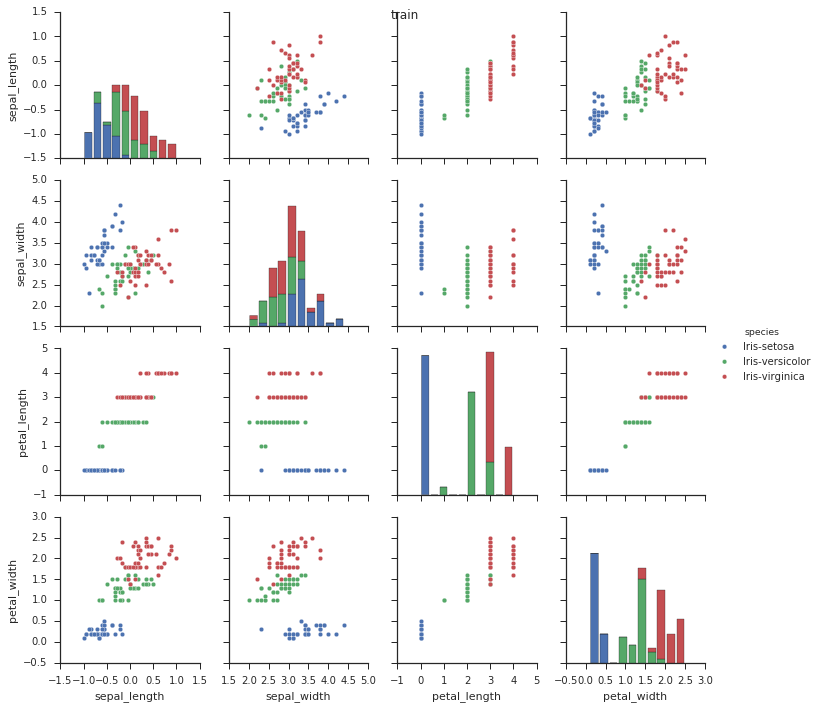

In [9]:
ds.plot(names=['train'])

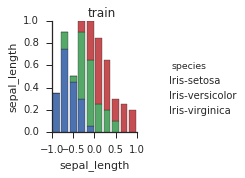

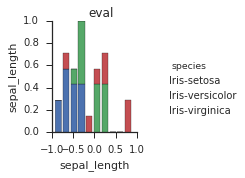

In [10]:
ds.plot(columns=['sepal_length'])

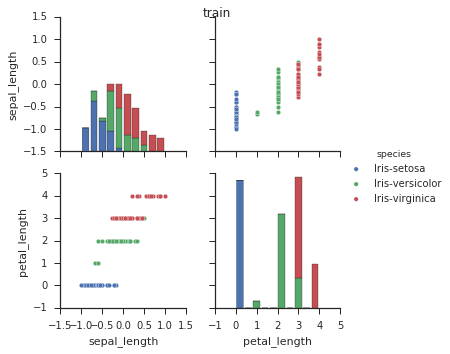

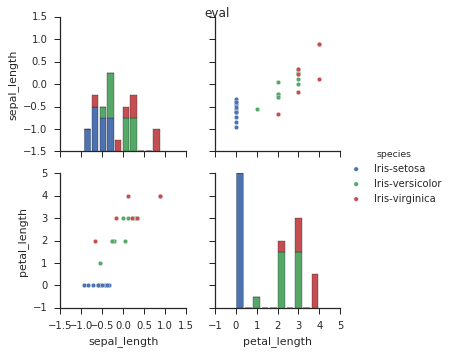

In [11]:
ds.plot(columns=['sepal_length', 'petal_length'])

Analyze one column 'petal_width'. It plots one histogram and one scatter plot with target column. Since in featureset class we choose 'identity()' transform, the values will be used directly.

In [7]:
ds.analyze('petal_width')

Analyze 'sepal_length' column. The values will be transformed first into [-1, 1] range.

In [14]:
ds.analyze('sepal_length')

Analyze 'petal_length' column. The values will be transformed into 5 buckets first before visualization. Note that the histogram will be plotted with 5 buckets, as we specified in 'features.numeric('petal_length').discretize(5)'. Also, in the scatter plot since both x axis and y axis are discrete values, many points overlap.

In [15]:
ds.analyze('petal_length')

We can also analyze two columns. It creates scatter plot with the two features, and color is used for target classes.

In [16]:
ds.analyze('petal_width', 'sepal_width')

Analyze three columns. You can zoom-in/out or rotate!

In [17]:
ds.analyze('sepal_width', 'petal_length', 'petal_width')

If you call analyze() with no columns, it shows you a profile on raw data.

In [18]:
ds.analyze()

Profile of DataSet "train"


Profile of DataSet "eval"
